I will use KNN to predict whether a tumor is malignant or benign using the Breast Cancer dataset.

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.sample(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
326,14.11,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.02733,0.1373,0.05700,...,18.00,98.40,749.9,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083,1
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,33.37,92.04,653.6,0.1419,0.1523,0.21770,0.09331,0.2829,0.08067,0


In [17]:
# Select features and target variable
X = df[['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry']]
y = df['target']  # 0 = malignant, 1 = benign

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled)

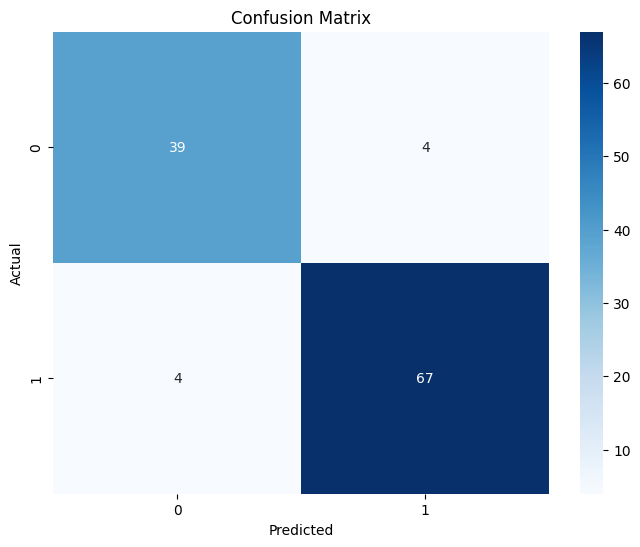

In [21]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def evaluate_predictions(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    FP = cm[0][1]
    TP = cm[1][1]

    N = FP + TN
    P = TP + FN

    return {
       'false_positive_rate': f"{FP / N:.2f}",
        'false_negative_rate': f"{FN / P:.2f}",
        'accuracy': f"{accuracy_score(y_test, y_pred):.2f}",
        'precision': f"{precision_score(y_test, y_pred):.2f}",
        'recall': f"{recall_score(y_test, y_pred):.2f}",
        'f1': f"{f1_score(y_test, y_pred):.2f}",
    }

evaluate_predictions(y_test, y_pred)


{'false_positive_rate': '0.09',
 'false_negative_rate': '0.06',
 'accuracy': '0.93',
 'precision': '0.94',
 'recall': '0.94',
 'f1': '0.94'}

Interpret the confusion matrix: what does each quadrant represent, and what does this say about the performance of our model? <br>
1. top-left quadrant: 39 represents the number of True Negatives. The model correctly predicted that 39 tumors are malignant(0) when they were truly malignant. <br>
2. top-right quadrant: 4 represents the number of False Positives. The model incorrectly predicted that 4 tumors were benign when they were actually malignant. <br>
3. bottom-left quadrant: 4 represents the number of False Negatives. The model incorrectly predicted that 4 tumors were malignant when they were actually benign. <br>
4. bottom-right quadrant: 67 represents the number of True Positive. The model correctly predicted that 67 tumors were benign when they were actually benign. <br>
- The model's accuracy is 92.98% and precision, recall, f1 is 94.36%. All of these show that the model performs quite well, indicating that the model does not make many errors in predicting whether a tumor is malignant or benign. However in the real-word, even small false positive and false negative rates can be critical so further tuning of the model may be needed.

Which number of neighbours results in the highest accuracy of the kNN classifier?

In [26]:
# List of different n_neighbors values to test
neighbors = range(1, len(X_train_scaled), 1)

best_n_neighbors = 1
best_accuracy = 0

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = (y_pred == y_test).mean()

    if accuracy > best_accuracy:
        best_n_neighbors = n
        best_accuracy = accuracy

print(f"Best number of neighbors: {best_n_neighbors}, with accuracy: {best_accuracy:.2f}")


Best number of neighbors: 25, with accuracy: 0.97


Is there evidence of overfitting? <br>

Since the training accuracy 95% and test accuracy 93% are similar in value, the model can be evaluated as generalizing well and thus there seems to be no evidence of overfitting here.

If you had to choose a single evaluation metric to summarize the performance of this classifier, which would you choose? Consider the data it's being used with and the application it's being used for. <br>

Since this is a medical context directly related to human life, I will choose the Recall metric. Recall measures the ability of a model to correctly identify all actual positive cases and get fewer false negatives. In this medical setting, recall would measure how many actual breast cancercases the model correctly identifies. Missing a cancer diagnosis may lead to life-threatening danger, so it's more important to capture all positive cases even if it means having some false positives than to have a model that misses them